In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/Users/prakharsoni/Downloads/Final_Dataset.csv')
data

,DATE,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
0,01-01-1990,132.100,3166.8,5.4,4208.4,3730.7,8.23,61.6440,795.4
1,01-02-1990,132.700,3179.2,5.3,4236.3,3728.2,8.24,62.2108,798.1
2,01-03-1990,133.500,3190.1,5.2,4254.0,3754.9,8.28,62.5068,801.5
3,01-04-1990,134.000,3201.6,5.4,4290.8,3770.0,8.26,62.3597,806.1
4,01-05-1990,134.400,3200.6,5.4,4296.0,3775.8,8.18,62.5474,804.2
...,...,...,...,...,...,...,...,...,...
401,01-06-2023,308.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,01-07-2023,308.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,01-08-2023,309.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,01-09-2023,310.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dropna(inplace=True)
data.head(5)

,DATE,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
0,01-01-1990,132.1,3166.8,5.4,4208.4,3730.7,8.23,61.6440,795.4
1,01-02-1990,132.7,3179.2,5.3,4236.3,3728.2,8.24,62.2108,798.1
2,01-03-1990,133.5,3190.1,5.2,4254.0,3754.9,8.28,62.5068,801.5
3,01-04-1990,134.0,3201.6,5.4,4290.8,3770.0,8.26,62.3597,806.1
4,01-05-1990,134.4,3200.6,5.4,4296.0,3775.8,8.18,62.5474,804.2


In [4]:
data.shape

(361, 9)

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data.set_index('DATE', inplace=True)

In [6]:
data.describe()

,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,199.881108,7323.863158,5.835457,9409.742105,8546.113573,2.900720,88.436744,1751.786427
std,36.436173,3626.527307,1.598390,3504.037378,3198.159508,2.364899,13.277816,913.237494
min,132.100000,3166.800000,3.500000,4208.400000,3728.200000,0.070000,60.306900,795.400000
25%,169.700000,3923.900000,4.600000,6140.200000,5548.800000,0.380000,80.480000,1103.500000
50%,199.000000,6424.500000,5.500000,9109.500000,8504.400000,2.420000,92.345900,1364.400000
75%,229.970000,10051.800000,6.800000,12272.100000,11018.500000,5.240000,99.056700,2315.000000
max,266.626000,15396.000000,10.000000,16557.600000,14815.700000,8.290000,104.118100,4021.200000


In [7]:
# Finding Correleation

correlation = data.corr()
print(correlation)

               CPI        M2    UNRATE      DSPI       PCE  FEDFUNDS  \
CPI       1.000000  0.967636 -0.054046  0.994616  0.995890 -0.744227   
M2        0.967636  1.000000 -0.075678  0.983629  0.978824 -0.705426   
UNRATE   -0.054046 -0.075678  1.000000 -0.060461 -0.069239 -0.449224   
DSPI      0.994616  0.983629 -0.060461  1.000000  0.999033 -0.723268   
PCE       0.995890  0.978824 -0.069239  0.999033  1.000000 -0.720467   
FEDFUNDS -0.744227 -0.705426 -0.449224 -0.723268 -0.720467  1.000000   
INDPRO    0.892088  0.779691 -0.241255  0.863101  0.876861 -0.570950   
M1SL      0.894835  0.969862 -0.160391  0.918470  0.908665 -0.626234   

            INDPRO      M1SL  
CPI       0.892088  0.894835  
M2        0.779691  0.969862  
UNRATE   -0.241255 -0.160391  
DSPI      0.863101  0.918470  
PCE       0.876861  0.908665  
FEDFUNDS -0.570950 -0.626234  
INDPRO    1.000000  0.663047  
M1SL      0.663047  1.000000  


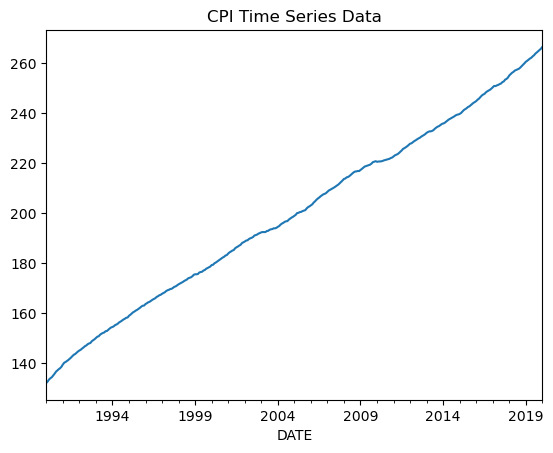

In [8]:
# Plot the time series data
data['CPI'].plot(title='CPI Time Series Data')
plt.show()

In [12]:
df = data.copy()

In [13]:
# Calculate the moving average with a window of your choice
window_size = 10  # Adjust the window size as needed
df['CPI_MA'] = df['CPI'].rolling(window=window_size).mean()

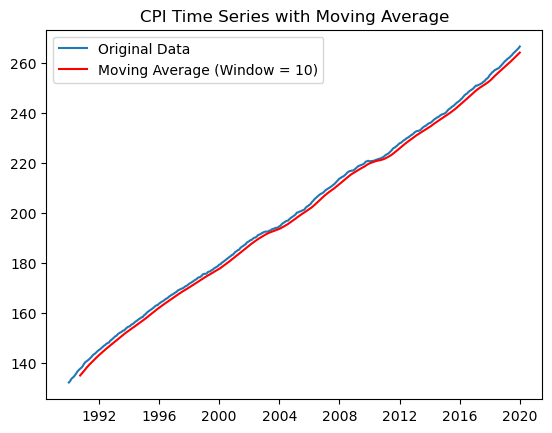

In [14]:
# Plot the original time series data and the moving average
plt.plot(df['CPI'], label='Original Data')
plt.plot(df['CPI_MA'], label=f'Moving Average (Window = {window_size})', color='red')
plt.legend()
plt.title('CPI Time Series with Moving Average')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Calculate MSE

df.dropna(inplace=True)  # Drop rows with NaN values
mse = mean_squared_error(df['CPI'], df['CPI_MA'])
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.907611872897728
